# Assignment_13_Random_Forest (Company_Data)

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd

In [2]:
Comp_d = pd.read_csv("D:\Data Science\Assignments\Company_Data.csv")
Comp_d.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
Comp_d['Sales'].mean()  # taking mean of sales column

7.496325

In [4]:
Comp_d.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
# Convert datatype of the sales(Continuous variables) columns into categorical variables.

sales = []
for i in Comp_d['Sales']:
    if i<=7.49:
        sales.append('Low')
    else:
        sales.append('High')
Comp_d['sales'] = sales

In [6]:
Comp_d.columns
Comp_d.drop('Sales', axis = 1, inplace =True)
Comp_d.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales'],
      dtype='object')

In [7]:
Comp_d[Comp_d.duplicated()]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales


In [8]:
Comp_d.shape

(400, 11)

In [9]:
Comp_d.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
Comp_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [48]:
# Checking categorical variables are continuous or discrete
print(Comp_d['ShelveLoc'].unique())
print(Comp_d['Urban'].unique())
print(Comp_d['US'].unique())
print(Comp_d['sales'].unique())

[0 1 2]
[1 0]
[1 0]
['High' 'Low']


In [49]:
# Dataset contains all discrete categorical variables so we convert it into numeric using label Encoding.
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Comp_d['ShelveLoc'] = LE.fit_transform(Comp_d['ShelveLoc'])
Comp_d['Urban'] = LE.fit_transform(Comp_d['Urban'])
Comp_d['US'] = LE.fit_transform(Comp_d['US'])
Comp_d['sales'] = LE.fit_transform(Comp_d['sales'])

In [50]:
print(Comp_d['ShelveLoc'].value_counts())
print(Comp_d['Urban'].value_counts())
print(Comp_d['US'].value_counts())
print(Comp_d['sales'].value_counts())

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64
1    282
0    118
Name: Urban, dtype: int64
1    258
0    142
Name: US, dtype: int64
1    201
0    199
Name: sales, dtype: int64


In [51]:
Comp_d.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [52]:
Comp_d.corr()   # Correlation between columns

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,-0.035578
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,-0.123460
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,-0.251910
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,-0.069327
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,0.392275
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,-0.106962
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,0.186707
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,0.028847
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,0.047090
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,-0.142579


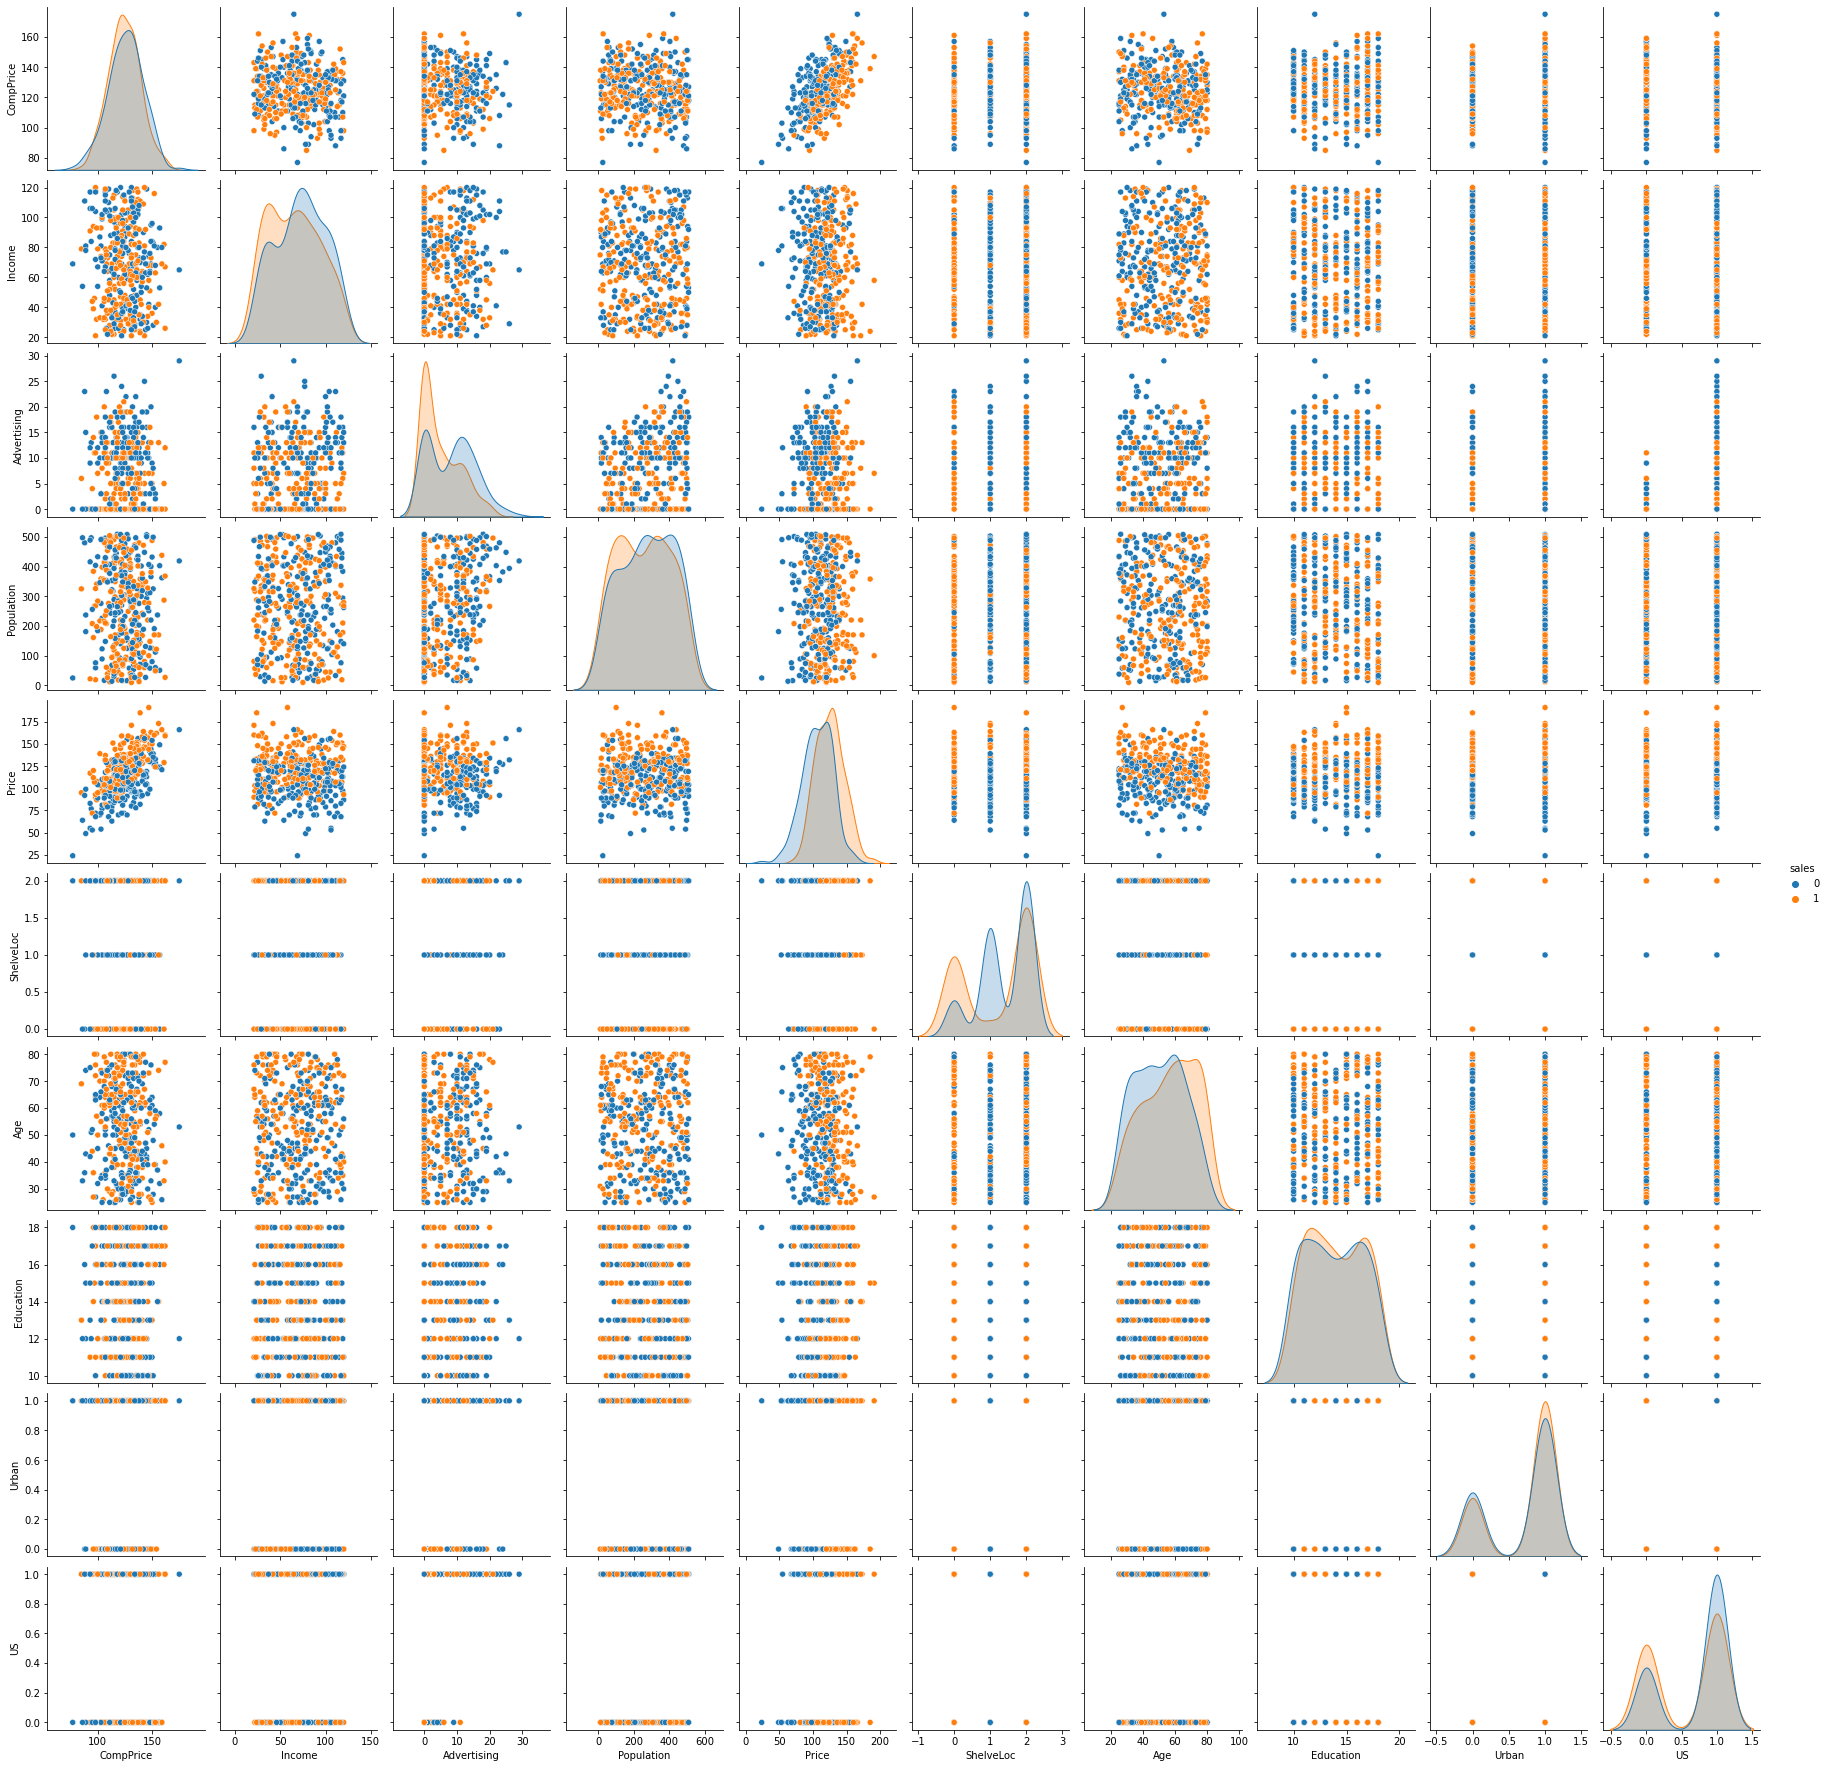

In [53]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Comp_d, hue = 'sales')
plt.show()

# Random Forest Classification

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [61]:
array = Comp_d.values
X = array[:,:-1]
Y = array[:,-1]
#print(X)
#print(Y)

In [56]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)  # Boostrap
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X,Y, cv = kfold)
print(results)
print('Accuracy is: ' , results.mean())

[0.625 0.75  0.8   0.725 0.875 0.825 0.925 0.8   0.775 0.8  ]
Accuracy is:  0.7899999999999999


# Bagging Decision Trees for Classification

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
# X = array[:,:-1]
# Y = array[:,-1]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)  #Evaluate Method
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator = cart, n_estimators = 100, random_state = 7) # Classifier

results = cross_val_score(model, X,Y, cv= kfold)
print(results.mean())

0.7849999999999999


# Adaboost Classification

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [70]:
X = array[:,:-1]
Y = array[:,-1]

kfold = KFold(n_splits=10, random_state = 7, shuffle = True)  # Evaluate Method

model = AdaBoostClassifier(n_estimators = 10, random_state = 7)  # Classifier

results = cross_val_score(model, X,Y ,cv = kfold)
print(results.mean())

0.7699999999999999


In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [74]:
array = Comp_d.values

X = array[:,:-1]
Y = array[:,-1]
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

# Create sub model
estimators = []
model1 = LogisticRegression(max_iter = 500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# Create the ensemble model 
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean())



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.8   0.75  0.825 0.7   0.85  0.875 0.675 0.7   0.7   0.75 ]
Accuracy is:  0.7625000000000001


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
